# S06_T01_Statistics

### Ex1: Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació standard i la mitjana aritmètica

In [2]:
#Importem llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Agafem el mateix dataset del Sptint anterior de la web Zenodo, amb alguns professionals del pàdel, que conté dades com el nom, alçada, ranking.
#punts, partits guanyats... de l'any 2020 i 2021.

pd.set_option("display.max_rows",None)
statistics_df= pd.read_csv("athlete_events.csv")
statistics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
#Comprovem si tenim NaN values i si hi ha els reemplaçem per zero's
statistics_df.fillna(value=0, inplace = True)
statistics_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0


In [7]:
#per fer l'exercici podem agafar l'atribut de l'edat
statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
statistics_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,24.663827,136.424553,54.305674,1978.378480
std,39022.286345,7.840652,73.450560,32.381492,29.877632
min,1.000000,0.000000,0.000000,0.000000,1896.000000
25%,34643.000000,21.000000,157.000000,47.000000,1960.000000
50%,68205.000000,24.000000,171.000000,64.000000,1988.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
#moda
age_mode = statistics_df["Age"].mode()
age_mode

0    23.0
dtype: float64

In [12]:
#mediana
age_median = statistics_df["Age"].median()
age_median

24.0

In [18]:
#desviació standard
age_desviacio = statistics_df["Age"].std()
#Arrodonim a dos decimals
round(age_desviacio, 2)

7.84

In [21]:
#mitjana aritmètica
age_mean = statistics_df["Age"].mean()
round(age_mean, 2)

24.66

Tal i com hem vist quan hem fet el .describe, les dades estadistiques que ens demanen coincideixen amb les que treiem del describe!

### Ex2: Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació

In [42]:
#Calcularé la correlació entre els atributs de pes i alçada (Weight i Height)
correl_sizes = statistics_df["Weight"].corr(statistics_df["Height"])
round(correl_sizes,3)

0.899

Com el coeficient de correlació ha d'estar entre (-1, 1), i veiem que és un coeficien més proper a 1 que no a zero, vol dir que tenim una correlació bastant lineal entre els dos atributs, i aquesta correlació és possitiva ja que s'acosta a +1, i no a -1. Tot i que en el nostre cas tenim valors zero dels dos atributs ja que manquen dades.
Es podia haver filtrat les dades per Weight >0 o Height >0, aleshores la correlació seria més real.

In [51]:
statistics_df = statistics_df[statistics_df.Height>0]
statistics_df.head(20)

In [44]:
statistics_df.tail(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",0
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",0
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",0
271098,135559,Pawe Jan Zygmunt,M,33.0,182.0,79.0,Poland,POL,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 5,000 metres",0
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",0
271101,135562,Milan Zyka,M,24.0,173.0,68.0,Czechoslovakia,TCH,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",0
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
271104,135564,Yevgeny Aleksandrovich Zykov,M,22.0,172.0,65.0,Russia-1,RUS,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Mixed (Men)'s Doubles,0
271105,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,0


In [52]:
statistics_df = statistics_df[statistics_df.Weight>0]
statistics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


In [53]:
#Torno a calcular la correlació entre els atributs de pes i alçada (Weight i Height)
correl_sizes = statistics_df["Weight"].corr(statistics_df["Height"])
round(correl_sizes,3)

0.796

Com podem comprovar ara, el coeficient de correlació entre les dues variables ja no és tan lineal, segueix sent correlació possitiva, però no s'acosta tant a 1 com abans

Text(0.5, 1.0, 'Weight vs Height')

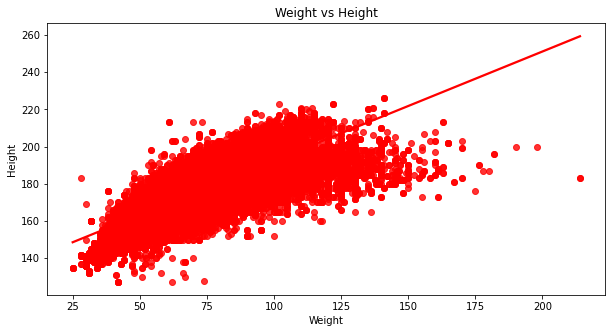

In [54]:
#Fem gràfic de dispersió (scatter)
plt.figure(figsize=(10,5))
sns.regplot(x=statistics_df["Weight"], y=statistics_df["Height"], color="red")
plt.title("Weight vs Height")

### Ex3: Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat

### Ex4: Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica